In [207]:
import pandas as pd
data = pd.read_csv('hr_data.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low


# DATA PRE-PROCESSING

In [208]:

data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()
data.reset_index(inplace=True)

In [209]:
data.shape

(12259, 12)

In [210]:
data.isna().sum()
data.drop(columns='is_smoker',inplace=True)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12259 entries, 0 to 12258
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  12259 non-null  int64  
 1   satisfaction_level     12259 non-null  float64
 2   last_evaluation        12259 non-null  float64
 3   number_project         12259 non-null  int64  
 4   average_montly_hours   11891 non-null  float64
 5   time_spend_company     12109 non-null  float64
 6   work_accident          12259 non-null  int64  
 7   left                   12259 non-null  object 
 8   promotion_last_5years  12259 non-null  int64  
 9   department             12259 non-null  object 
 10  salary                 12259 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.0+ MB


In [212]:
data.columns
data.rename(columns={'average_montly_hours':'average_monthly_hours'},inplace=True)

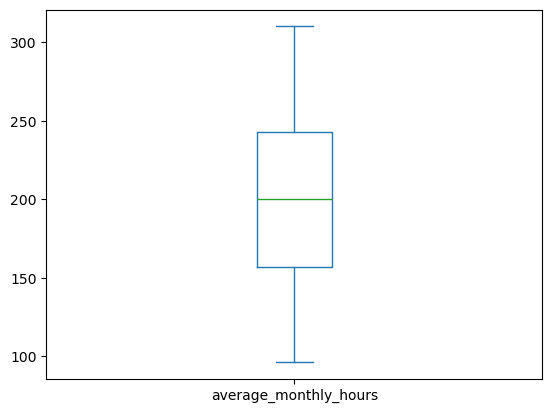

In [213]:
data['average_monthly_hours'].plot.box()
data['average_monthly_hours'].fillna(data['average_monthly_hours'].mean(),inplace=True)

<Axes: >

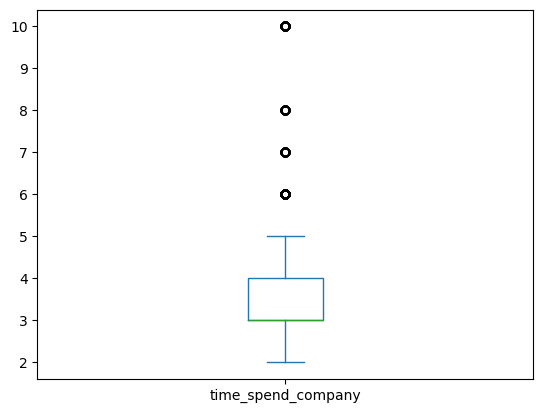

In [214]:

data['time_spend_company'].plot.box()

In [215]:
data['time_spend_company'].fillna(data['time_spend_company'].mean(),inplace=True)


# ENCODING

In [216]:
from sklearn.preprocessing import OneHotEncoder
en= data[['salary','left']]
encoder = OneHotEncoder(drop='first',sparse_output=False)
ar=encoder.fit_transform(en)
encoded=pd.DataFrame(ar,columns=['salary_low','salary_medium','left_yes'])
data=pd.concat([data,encoded],axis=1)
data

,index,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_low,salary_medium,left_yes
0,0,0.38,0.53,2,157.000000,3.000000,0,yes,0,sales,low,1.0,0.0,1.0
1,1,0.80,0.86,5,262.000000,6.000000,0,yes,0,sales,medium,0.0,1.0,1.0
2,2,0.11,0.88,7,272.000000,4.000000,0,yes,0,sales,medium,0.0,1.0,1.0
3,3,0.72,0.87,5,223.000000,5.000000,0,yes,0,sales,low,1.0,0.0,1.0
4,4,0.37,0.52,2,200.511732,3.380048,0,yes,0,sales,low,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,14968,0.40,0.47,2,128.000000,3.000000,0,yes,0,sales,medium,0.0,1.0,1.0
12255,14969,0.43,0.46,2,157.000000,3.000000,0,yes,0,sales,medium,0.0,1.0,1.0
12256,14990,0.89,0.88,5,228.000000,5.000000,1,yes,0,support,low,1.0,0.0,1.0
12257,14993,0.76,0.83,6,293.000000,6.000000,0,yes,0,support,low,1.0,0.0,1.0


In [217]:
from sklearn.preprocessing import OneHotEncoder
en= data[['department']]
encoder = OneHotEncoder(drop='first',sparse_output=False)
ar=encoder.fit_transform(en)
features=encoder.get_feature_names_out(['department'])
encoded=pd.DataFrame(ar,columns=features)
data=pd.concat([data,encoded],axis=1)
data.columns


Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'salary_low',
       'salary_medium', 'left_yes', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

# Scaling

In [220]:
from sklearn.preprocessing import StandardScaler
x=data[['average_monthly_hours']]
scaling=StandardScaler()
y=scaling.fit_transform(x)
z=pd.DataFrame(data=y,columns=['average_monthly_hourss'])
data=pd.concat([data,z],axis=1)
data=data.drop(columns=['average_monthly_hours'])

# LOGISTIC REGRESSION

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=data[['satisfaction_level','salary_low','salary_medium','average_monthly_hourss','time_spend_company','last_evaluation','number_project','work_accident','department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical']]
y=data['left_yes']
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [264]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
score=model.score(X_test,y_test)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
score

0.8270799347471451

# RANDOM FOREST

In [265]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [280]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
scoree=model.score(X_test,y_test)
print(f'Model Accuray Score : {scoree:.2f}')
y_predd=model.predict(X_test)
ccm=confusion_matrix(y_test,y_predd)

Model Accuray Score : 0.98


# DECISION TREE

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
modell=DecisionTreeClassifier(random_state=42)
modell.fit(X_train,y_train)
scoreee=modell.score(X_test,y_test)
print(f'Model Accuray Score : {round(scoreee,2)}')
y_preddd=model.predict(X_test)

cmd=confusion_matrix(y_test,y_preddd)

Model Accuray Score : 0.97


# Confusion Matrix Comparsion

Text(0.5, 1.0, 'Decision Tree')

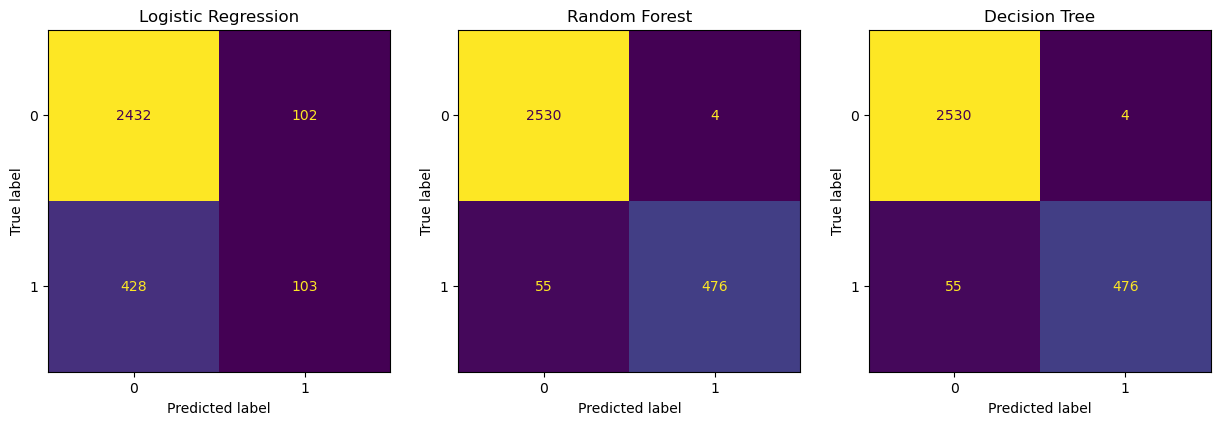

In [268]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ConfusionMatrixDisplay(cm).plot(ax=plt.gca(), colorbar=False)
plt.title('Logistic Regression')
plt.subplot(1,3,2)
ConfusionMatrixDisplay(ccm).plot(ax=plt.gca(), colorbar=False)
plt.title('Random Forest')
plt.subplot(1,3,3)
ConfusionMatrixDisplay(cmd).plot(ax=plt.gca(), colorbar=False)
plt.title('Decision Tree')

# Accuracy Score Comparsion

In [278]:
print(f'''Accuracy Score Comparsion

Logistic Regression : {score * 100:.2f}%
Decision Tree : {scoreee*100 : .2f}%
Random Forest : {scoree*100 : .2f}%''')

Accuracy Score Comparsion

Logistic Regression : 82.71%
Decision Tree :  96.70%
Random Forest :  98.08%
